In [1]:
#How-to Guide for Calculating Normalized Difference Vegetation Index for Landsat data acquired of an area

In [2]:
import numpy as np
import rasterio as rio
import rasterio.plot
from rasterio import plot
from rasterio.plot import show
import rasterio.features
import matplotlib.pyplot as plt
import os
%matplotlib notebook
%matplotlib inline

In [3]:
#Verify that you are working in the correct directory
os.getcwd()

'C:\\Users\\aaturne1'

In [4]:
os.chdir ('C:\\Users\\aaturne1\\data\\NDVI_Maps_USEME')

In [5]:
#Load raster data sets to be read
L05_band3 = rasterio.open('L05_NDVI_2003_B3.tif')
L05_band4 = rasterio.open('L05_NDVI_2003_B4.tif')

In [6]:
L05_band3.height
L05_band4.height

5503

In [7]:
L05_band3.width
L05_band4.width

4334

In [8]:
#Observe transformation to compare to second raster dataset (Landsat 08 for this How-to Guide)
L05_band3.transform
L05_band4.transform

Affine(30.0, 0.0, 303045.0,
       0.0, -30.0, -720105.0)

In [9]:
#Observe coordinate reference system to compare to second raster dataset (Landsat 08 for this How-to Guide)
L05_band3.crs
L05_band4.crs

CRS.from_epsg(32622)

In [10]:
#Observe raster data structure to know what to expect in numpy array
L05_band3.dtypes
L05_band4.dtypes

('uint8',)

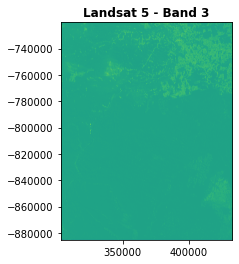

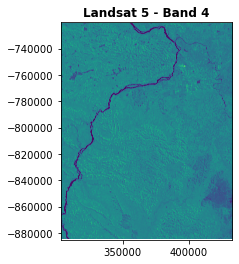

<AxesSubplot:title={'center':'Landsat 5 - Band 4'}>

In [11]:
#Visualize raster data
plot.show(L05_band3, title='Landsat 5 - Band 3')
plot.show(L05_band4, title='Landsat 5 - Band 4')

In [12]:
#Read pixel values in the form of Numpy array. Verify data structure type. 
L05_band3.read(1)
L05_band4.read(1)

array([[255, 255, 255, ..., 255, 255, 255],
       [ 70,  72,  78, ...,  86,  84,  78],
       [ 77,  77,  79, ...,  79,  82,  81],
       ...,
       [255, 255, 255, ...,  79,  74,  75],
       [255, 255, 255, ...,  85,  77,  76],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [13]:
#Convert Numpy array to float
red = L05_band4.read(1).astype('float64')
nir = L05_band3.read(1).astype('float64')

nir

array([[-128., -128., -128., ..., -128., -128., -128.],
       [  17.,   18.,   17., ...,   15.,   15.,   14.],
       [  17.,   18.,   18., ...,   15.,   16.,   15.],
       ...,
       [-128., -128., -128., ...,   15.,   15.,   15.],
       [-128., -128., -128., ...,   15.,   15.,   14.],
       [-128., -128., -128., ..., -128., -128., -128.]])

In [14]:
#Calculate NDVI
ndvi =np.where(
    (nir+red)==0.,
    0,
    (nir-red)/(nir+red)

)

ndvi[:5, :5]

array([[-3.01574803, -3.01574803, -3.01574803, -3.01574803, -3.01574803],
       [-0.6091954 , -0.6       , -0.64210526, -0.6344086 , -0.63043478],
       [-0.63829787, -0.62105263, -0.62886598, -0.60465116, -0.62222222],
       [-0.625     , -0.59090909, -0.6       , -0.61702128, -0.62222222],
       [-0.63265306, -0.64705882, -0.61290323, -0.59550562, -0.60869565]])

In [15]:
print (ndvi.min())
print(ndvi.max())
print(ndvi.mean())

-3.015748031496063
0.6666666666666666
-0.5992013373312733


In [16]:
os.chdir ('C:\\Users\\aaturne1\\data\\NDVI_Maps_USEME\\NDVI_results')

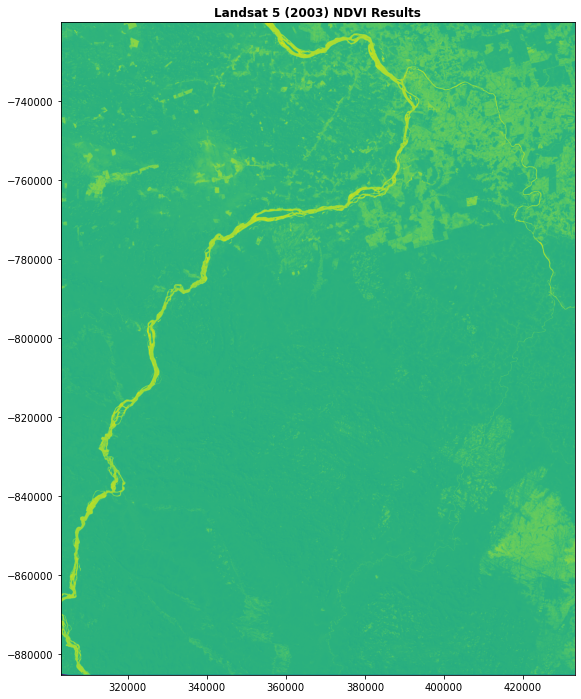

<AxesSubplot:title={'center':'Landsat 5 (2003) NDVI Results'}>

In [17]:
#Visualize NDVI results 
ndvi = rasterio.open('../NDVI_results/L05_NDVI_results.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndvi, title = 'Landsat 5 (2003) NDVI Results')

In [18]:
os.chdir ('C:\\Users\\aaturne1\\data\\NDVI_Maps_USEME')

In [19]:
os.getcwd()

'C:\\Users\\aaturne1\\data\\NDVI_Maps_USEME'

In [20]:
L08_band4 = rasterio.open('L08_NDVI_2021_B4.tif')
L08_band5 = rasterio.open('L08_NDVI_2021_B5.tif')

In [21]:
L08_band4.height
L08_band5.height

5503

In [22]:
L08_band4.width
L08_band5.width

4334

In [23]:
L08_band4.transform
L08_band5.transform

Affine(30.0, 0.0, 303045.0,
       0.0, -30.0, -720105.0)

In [24]:
L08_band4.crs
L08_band5.crs

CRS.from_epsg(32622)

In [25]:
L08_band4.dtypes[0]
L08_band5.dtypes[0]

'uint16'

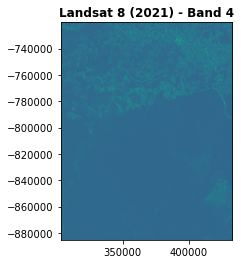

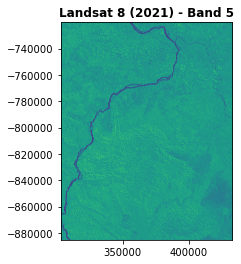

<AxesSubplot:title={'center':'Landsat 8 (2021) - Band 5'}>

In [26]:
plot.show(L08_band4, title ='Landsat 8 (2021) - Band 4')
plot.show(L08_band5, title = 'Landsat 8 (2021) - Band 5')

In [27]:
L08_band4.read(1)
L08_band5.read(1)

array([[    0,     0,     0, ...,     0,     0,     0],
       [19286, 19060, 18450, ..., 19550, 18826, 17782],
       [18957, 19859, 20552, ..., 19451, 18732, 18577],
       ...,
       [17884, 17797, 17803, ..., 19133, 18426, 18892],
       [17211, 17839, 18650, ..., 21627, 19577, 18984],
       [    0,     0,     0, ...,     0,     0,     0]], dtype=uint16)

In [28]:
red2 = L08_band4.read(1).astype('float64')
nir2 = L08_band5.read(1).astype('float64')

nir2

array([[    0.,     0.,     0., ...,     0.,     0.,     0.],
       [19286., 19060., 18450., ..., 19550., 18826., 17782.],
       [18957., 19859., 20552., ..., 19451., 18732., 18577.],
       ...,
       [17884., 17797., 17803., ..., 19133., 18426., 18892.],
       [17211., 17839., 18650., ..., 21627., 19577., 18984.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.]])

In [29]:
ndvi2 =np.where(
    (nir2+red2)==0.,
    0,
    (nir2-red2)/(nir2+red2)

)

ndvi2[:5, :5]

C:\Users\aaturne1\AppData\Local\Temp\1\ipykernel_16744\4052639475.py:4: RuntimeWarning: invalid value encountered in true_divide
  (nir2-red2)/(nir2+red2)


array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.41170442, 0.40591576, 0.39093068, 0.4140921 , 0.42171952],
       [0.40354644, 0.42205514, 0.43599776, 0.43921966, 0.42068866],
       [0.42444924, 0.42092092, 0.4340667 , 0.44237582, 0.44164268],
       [0.45637071, 0.44970614, 0.41735225, 0.42963225, 0.43843875]])

In [30]:
print(ndvi2.min())
print(ndvi2.max())
print(ndvi2.mean())

-0.3290302655960469
0.6144018583042973
0.36954570310672435


In [31]:
os.chdir ('C:\\Users\\aaturne1\\data\\NDVI_Maps_USEME\\NDVI_results')

In [32]:
ndviimage2 = rasterio.open('../NDVI_results/L08_NDVI_results_.tiff', 'w', driver='Gtiff', 
                         width = L08_band4.width, height = L08_band4.height,
                         count=1,
                         crs=L08_band4.crs,
                         transform=L08_band4.transform,
                         dtype='float64' 
                         )
ndviimage2.write(ndvi2, 1)
ndviimage2.close()

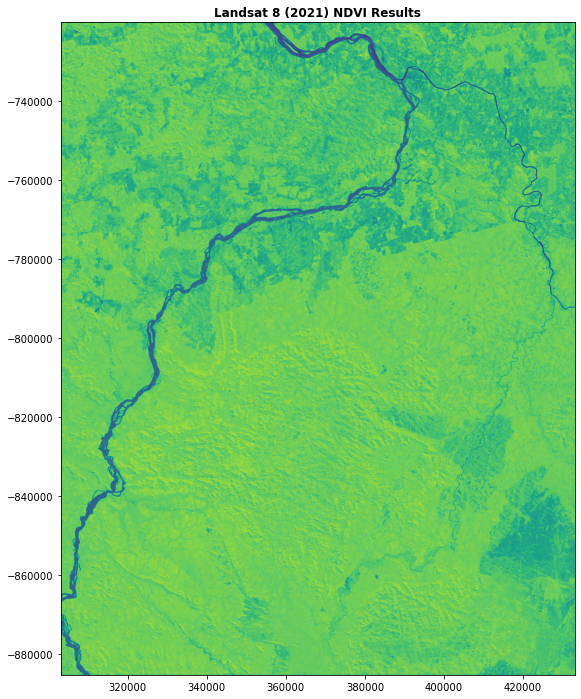

<AxesSubplot:title={'center':'Landsat 8 (2021) NDVI Results'}>

In [33]:
#Visualize NDVI results 
ndvi2 = rasterio.open('../NDVI_results/L08_NDVI_results_.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndvi2, title = 'Landsat 8 (2021) NDVI Results')

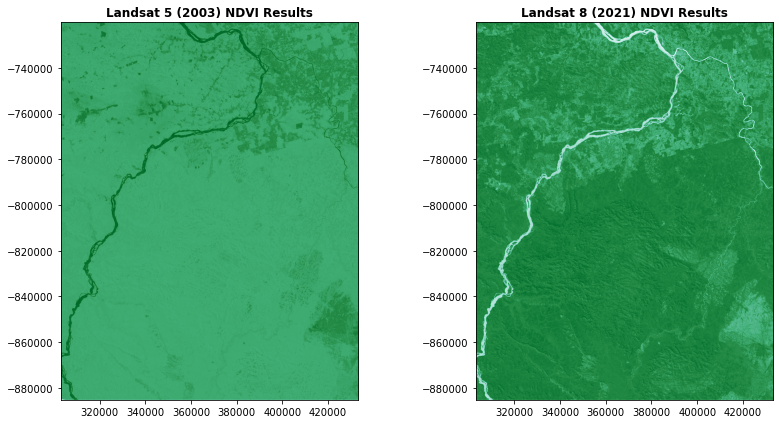

In [34]:
#Vizualize NDVI results from 2003 and 2001
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(ndvi, ax=ax1, cmap='BuGn', title = 'Landsat 5 (2003) NDVI Results') 
plot.show(ndvi2, ax=ax2, cmap='BuGn', title = 'Landsat 8 (2021) NDVI Results')
fig.tight_layout()